# Two Point Angular Correlation Function (2PACF)
This notebook stands for to calculate (in a bruteforce way) the shear estimators ($\xi_{\pm}$) for the 2PACF.

First let's start by importing a few libraries we need along of this notebook and defining a function for plotting

In [1]:
# libs import
import numpy as np # contains most broadly numeric calculation tools in python
import sys # to access to system's libraries and paths
import cmath as cm # Complementary to numpy, useful for complex numbers
from matplotlib import pyplot as plt # python module for plotting

In [2]:
# **do not mind this cell, it is just for plotting**
def plotpnts (cat,xlim,ylim,boxsize=2,arrow=False,tag=None,scale=2,annotate=True):
    #tag=[beta,alpha]
    plt.figure(figsize=(scale,scale));alen=boxsize/15;awidth=boxsize/100;aoffset=boxsize/30;n=len(cat);labels=[];
    for ii in range(n):
        labels.append("p"+str(ii)); plt.plot(np.transpose(cat)[0],np.transpose(cat)[1],linestyle="none",marker="*",markersize=7,c="magenta")
    for ii,label in enumerate(labels):
        if arrow:
            anorm=np.linalg.norm([np.transpose(cat)[2][ii],np.transpose(cat)[3][ii]])+10**(-5)
            if anorm > 0:
                plt.arrow(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii],\
                           np.transpose(cat)[2][ii]*alen/anorm,np.transpose(cat)[3][ii]*alen/anorm,width = awidth,\
                              fc="gray",ec="none",head_width=3.5*awidth)
                if annotate:plt.annotate(label,(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii]),\
                     xytext=(np.transpose(cat)[0][ii]+aoffset+np.transpose(cat)[2][ii]*alen/anorm,\
                         np.transpose(cat)[1][ii]+aoffset+np.transpose(cat)[3][ii]*alen/anorm))  
        else: plt.annotate(label,(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii]),\
                     xytext=(np.transpose(cat)[0][ii]+.05,np.transpose(cat)[1][ii]+.05))
    plt.xlim(xlim[0],xlim[1]); plt.ylim(ylim[0],ylim[1])
    plt.xlabel("RA [rad]"); plt.ylabel("DEC [rad]")
    if tag:
        plt.text(-boxsize*2/5 ,boxsize*3/5,"beta="+str(tag[0])[:4]+" deg"+"\nphi="+str(tag[1])[:4]+" deg")
    plt.show()
    pass

## A Glance to Weak Lensing (WL) Parameters
**_In WL_** we borrow the _polarization_ parameters $(I,Q,U)$ which hold the polarization shape, here in WL the parameters $(q,\epsilon_1 ,\epsilon_2)$ hold the galaxy shape. Moreover, the next approximation is valid
\begin{equation*}
\epsilon \approx  \epsilon_\text{intrinsic} + 2\gamma
\label{eq:approx} \tag{1}
\end{equation*}
where $\epsilon$ and $\gamma$ are both complex and defined as
\begin{equation*}
\gamma := \gamma_1 + i \gamma_2 \qquad \epsilon := \epsilon_1 + i \epsilon_2 \,.
\label{eq:def_complexes} \tag{2}
\end{equation*}

The parameter $\gamma$ is called **shear**. A _picture_ of how does $\gamma$ modifies the galaxy shape is shown in the next picture
<img src="./images/shape.png" width=200 height=200 />

## Estimator
Given the locus of this session; for a level of data we do not how each part of \eqref{eq:approx} can be estimated, so we only gonna foccus on $\gamma$ for it. 
Furthermore, to first order we expect no correlation for $\epsilon_\text{intrinsic}$ between two points, neither of $\epsilon_\text{intrinsic}$ with shear from another point. Therefore the _ensamble average_ , $\left\langle \cdot\right\rangle$, of $\epsilon$ and $\gamma$ are equivalent, 
\begin{equation*}\label{eq:equivalence}\tag{3}
\left\langle \epsilon\right\rangle \equiv \left\langle\gamma\right\rangle\,.
\end{equation*}
 – It is a common practice though.
 
 ### Introduction to $\xi_\pm$
In order to exploit the two point structure, we only may care about the line between two galaxies and its direction, which is called $\boldsymbol{\theta}$-axis.

Then the shear should be projected to the $\boldsymbol{\theta}$-axis. These projections form a new basis coined $\gamma_t$ and $\gamma_\times$ (same is for $\epsilon$). $\gamma_{\{t,\times\}}$ replaces $\gamma_{\{1,2\}}$ respect to $\boldsymbol{\theta}$.


The simplest estimator for a correlation function of two points of the $\gamma_{\{t,\times\}}$ is ([1411.0115](https://arxiv.org/abs/1411.0115))
\begin{equation*}
\xi_\pm (\boldsymbol{\theta}) = \sum_{i=1}^{n}\sum_{j=1}^{n}\dfrac{w^iw^j\left(\epsilon_t^i(\boldsymbol{0})\epsilon_t^j(\boldsymbol{\theta}) \pm \epsilon_\times^i(\boldsymbol{0}) \epsilon_\times^j(\boldsymbol{\theta})\right)}{w^iw^j}
\label{eq:def_principal} \tag{4}
\end{equation*}
A bit of explanation in the RHS of \eqref{eq:def_principal} should be offered: $i,j$ superscripts mean the respective point from catalog; $\mathbf{0}$ means we settle on the first galaxy, being our new origin, and then go to second particle's position, forming the $\boldsymbol{\theta}$ vector. Therefore $\boldsymbol{\theta}$ is the axis joining the two regarded galaxies; the weights $w^iw^j$, we are using every weight as 1, this does not have impact for now, since we are not working with a real catalog but we are only grasping the skeleton of 2PACF.

Assuming the isotropy in the Universe, estimator \eqref{eq:def_principal} reduces to a simple histogram in distance $\theta = |\boldsymbol{\theta}|$. Evenmore, employing \eqref{eq:equivalence} it can be casted in $\gamma$s fashion and using the ensemble notation it looks like
\begin{equation*}\label{eq:xi_pm}\tag{5}
\xi_\pm (\theta) =  \sum_{i=1}^{n}\sum_{j=1}^{n}\dfrac{w^iw^j\left(\gamma_t^i(\boldsymbol{0})\gamma^j(\boldsymbol{\theta}) \pm \gamma_\times^i(\boldsymbol{0}) \gamma_\times^j(\boldsymbol{\theta})\right)}{w^iw^j} \equiv \left\langle \gamma_t(\mathbf{0})\gamma_t(\boldsymbol{\theta})\right\rangle \pm \left\langle \gamma_\times(\mathbf{0})\gamma_\times(\boldsymbol{\theta})\right\rangle\,,
\end{equation*}
which is the usual form displayed in literature. Notice that in \eqref{eq:xi_pm} the $\boldsymbol{0}$ and $\boldsymbol{\theta}$ tell which particle is considered on time so superscripts \{1,2\} are no longer needed.  

### Calculation of the 2PACF Estimator
Though the procedure for \eqref{eq:xi_pm} seems strightforward; i.e., to use $\gamma_1$ and $\gamma_2$ from a catalog and obtain $\gamma_t$ (gt) and $\gamma_\times$ (gx), then calculate the histogram, it is a bit harder from a numerical point of view. This is because the basis $(\gamma_t,\gamma_\times)$ is $(-\mathrm{Re}(\gamma e^{-2i\phi}),-\mathrm{Im}(\gamma e^{-2i\phi}))$, where $\phi$ is the angle of $\theta$. So we need to calculate this angle involved for each pair.

Instead it is noticed that $\gamma_t + i \gamma_\times \equiv -\gamma e^{-2i\phi}$. This brings the calculation of $\xi_\pm (\theta)$ as 

\begin{equation*}\label{eq:xip}\tag{6}
\xi_+ (\theta)=\mathrm{Re}\left\langle \gamma(\boldsymbol{0}) \gamma^{*}(\boldsymbol{\theta})\right\rangle(\theta)
\end{equation*}
\begin{equation*}\label{eq:xim}\tag{7a}
\xi_- (\theta)=\mathrm{Re} \left\langle\gamma(\boldsymbol{0})\gamma(\boldsymbol{\theta})e^{-4i\phi}\right\rangle(\theta)
\end{equation*}
all defined in Kilbinger's review ([1411.0115](https://arxiv.org/abs/1411.0115)).


In equation \eqref{eq:xip} the angle phi gets canceled, but in \eqref{eq:xim} it is added. The exponential, however is just the angular part of the polar form for $\boldsymbol{\theta}$; which we turn in favor of angles calculation.
\begin{equation*}\label{eq:def_dotProduct}\tag{8}
\theta=\lvert\theta\rvert e^{2i\phi}
\end{equation*}
with $\phi$ the angle between $x$-axis and $\theta$-axis. Therefore, $e^{-4i\phi} = \left(\dfrac{\boldsymbol{\theta}}{|\theta|}\right)^{-2}$.

So, $\xi_-$ is
\begin{equation*}\label{eq:xim2}\tag{7b}
\xi_- (\theta)=\mathrm{Re}\left\langle \gamma^1 \gamma^2  \left(\dfrac{\boldsymbol{\theta}}{|\theta|}\right)^{-2}\right\rangle(\theta)
\end{equation*}
hence any calculation for angles is void.

## Let's Code!
### Brute Force Estimator
We shall considerate conventions for the estimator:
- theta distances and binning are in logarithmic space
- $\theta$, $\gamma^1$ and $\gamma^2$ are all of them complex
- $\theta_\text{min}$ should be $> 0$ and $\theta_\text{max}>\theta_\text{min}$. This implies $\theta_\text{binzise}>0$

In [3]:
def hist(cat,theta_min,theta_max,nbin=20):
    
    # finds corresponding bin of a given distance x
    def binning(x):
        return int(np.log(x/theta_min)/thetaBinsize) #   thetaBinsize should be greater than zero
    
    # calculates (cartesian) distance between two points
    def dist(x1,x2):
        return np.linalg.norm(x1-x2) #   x's are arrays
    
    # bin size for theta distances
    thetaBinsize = np.log(theta_max/(theta_min))/nbin 
    
    # extractt right ascension and declination of all galaxies from catalogs
    ra,dec = np.transpose(cat)[0],np.transpose(cat)[1] 
    
    # number of galaxies contained in the catalog
    npts = len(ra); 
    
    # total number of galaxies counted and count in each bin
    totn = 0; cntr = np.zeros(nbin); 
    
    #   arrays' initialization
    xi_minus = np.zeros(nbin); xi_plus = np.zeros(nbin) 
    
    
    # O(N^2) algorithm over all catalog points that calculates the shear correlations
    for ii in range(npts):
        for jj in range(npts):
            if jj >= ii: continue # no pairs are repeated and no same-point pairs
            
            # calculates pair distances, checks if it's within range and counts total pairs
            normTheta = dist(np.array([ra[ii],dec[ii]]),np.array([ra[jj],dec[jj]])); totn += 1
            if normTheta > theta_max or normTheta < theta_min:continue 
            
            # defined complex theta, gamma1, gamma2, and the magnitudes |gamma1| and |gamma2| 
            theta=abs(ra[jj]-ra[ii])+1j*abs(dec[jj]-dec[ii]); 
            g1=cat[ii][2:][0]+1j*cat[ii][2:][1]
            g2=cat[jj][2:][0]+1j*cat[jj][2:][1]
            normg1 = np.linalg.norm(g1)
            normg2 = np.linalg.norm(g2)
            
            # Calculates the x,t projector using that
            # theta= theta_x+i*theta_y implies exp(2*i*phi)= (theta_x+i*theta_y)/|theta|
            exp2iphi= theta/normTheta
            
            # Calculates the two point contribution + and - of each pair
            xi_plus[binning(normTheta)]+= (g1*g2.conjugate()).real
            xi_minus[binning(normTheta)]+= (g1*g2*exp2iphi**(-2)).real
            
            
    return xi_plus,xi_minus,totn

## Running the 2PACF estimator
We first shall declare a set of example catalogs to grasp the idea and then a larger catalog for running a bit more serious:

### set of catalogs
- _cats_. Considerate 2 galaxies; one in the origin $(x,y)=(0,0)$, and the other forming the  $\theta$-axis with an angle $\beta$ respect to x-axis:
 - $\beta=\{0,\pi/3\}$ in rad
 
 then some cases for $\gamma(\boldsymbol{0})$ and $\gamma(\boldsymbol{\theta})$ forming an angle respec to x-axis
 - $\phi=\{0,\pi/4,\pi/2,3\pi/4,\pi,5\pi/4,7\pi/4\}$

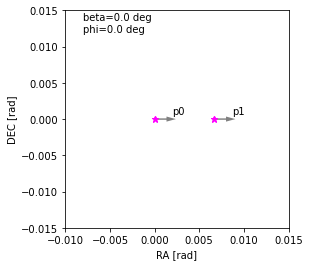

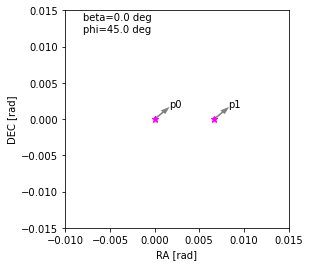

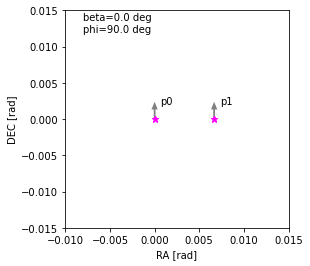

In [4]:
# We construct catalogs of only two points with identical gammas.

# Size of the data catalog box (assumed squared) 
boxsize = .02 

# Assume some fixed magnitude for all gammas
gamma=1/np.sqrt(2)

# Separation of the two points (ie theta)
pointsseparation=boxsize/3

# Store the catalog here
cats=[]

# choice of inclination angles for the two points (angle of theta wrt to x-axis)
beta = [0,np.pi/3] 

# choice of angles between between gamma and theta
phis = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,7*np.pi/4]

#Let us construct all possible catalogs
for a1 in beta:
    for a2 in phis:
        cats.append([[0,0,gamma*np.cos(a1+a2),gamma*np.sin(a1+a2)],
                     [pointsseparation*np.cos(a1),pointsseparation*np.sin(a1),
                      gamma*np.cos(a1+a2),gamma*np.sin(a1+a2)]])

# To plot the catalogs. Change stopat to see more or less plots
cntr=0; stopat=0
for ii in range(len(cats)):
    if stopat == 3: continue
    if ii<=len(phis)-1:
        a1=round(np.rad2deg(beta[0]),3)
    else: 
        a1=np.rad2deg(beta[1])
    a2=round(np.rad2deg(phis[cntr]),3)
    plotpnts(cats[ii],[-boxsize/2,boxsize*3/4],[-boxsize*3/4,boxsize*3/4],boxsize=boxsize,arrow=True,tag=[a1,a2],scale=4)
    if cntr == len(phis)-1:cntr=0
    else: cntr+=1
    stopat+=1

**Note**: the gray arrow gives the direction of $\gamma$ respect to an external far observer.

In [5]:
# choose number of bins
rbin=6

# choose minimal distance
minr=10**(-8)

# choose maximal distance
maxr=boxsize

#### TreeCorr (TC) Estimator
To check our estimator answer, letś check what TC gives

In [6]:
import treecorr as tc

TC has many features but here we only deploy `GGCorrelation` class. This may be called with initialization parameters as follows
<br>
<br>
> `tc.GGCorrelation(nbin,min_sep,max_sep,sep_units)`

- 1st parameter is an integer obj. meaning the number of bins in distance $\theta$
- 2nd and 3rd parameters are float objs. stating the minimum/maximum interest value for $\xi_pm$ 
- 4th parameter is string obj. defining the resulting units for the correlation

there are more options for this class and we encourage you to go and check out [TC's docs](https://rmjarvis.github.io/TreeCorr/_build/html/gg.html)

In [7]:
ggcorr=tc.GGCorrelation(nbins=rbin,min_sep=minr,max_sep=maxr,sep_units="rad",verbose=2,brute=True)
# verbose can be settled to 0 so no extra information of the running is output
# brute is a bool obj.; if True (default=False) uses brute force calculation

nbins = 6, min,max sep = 1e-08..0.02 rad, bin_size = 2.41811
Doing brute force calculation for first field.


Next we ougth to create a Catalog instance from Catalog class within TC. We do this in the following way (remember our catalog named _cat_)
<br>
<br>
>`tc.Catalog(ra,dec,g1,g2,ra_units,dec_units)`

where
- 1st - 4th parameters are array-like obj. declaring columns for Right Ascension; Declination, gamma1 and gamma2 
- 5th - 6th are string objs. specififying the units of the input catalog

It's optional to give another column for weights parameter. Nonetheless there is another way to create a `Catalog`, [check TC library for broader explanation](https://rmjarvis.github.io/TreeCorr/_build/html/catalog.html?highlight=catalog#treecorr.Catalog).

In [8]:
tcCat=tc.Catalog(ra=np.transpose(cats[0])[0],dec=np.transpose(cats[0])[1],g1=np.transpose(cats[0])[2],g2=np.transpose(cats[0])[3],ra_units="rad",dec_units="rad")

To get the correlation functions we use `process` method of `GGCorrelation` with our catalog

In [9]:
%%time
ggcorr.process(tcCat) # one catalog, gives auto correlation, more than one gives the cross correlation function 

..
CPU times: user 25.2 ms, sys: 0 ns, total: 25.2 ms
Wall time: 3.73 ms


now the instance _ggcorr_ has the correlation functions $\xi_\pm$ as member variables. We access to them as follows

In [10]:
print(" tc_xip={}\n tc_xim={}\n pairs={}".format(ggcorr.xip,ggcorr.xim,ggcorr.npairs))

 tc_xip=[0.         0.         0.         0.         0.         0.49999998]
 tc_xim=[0.         0.         0.         0.         0.         0.49999998]
 pairs=[0. 0. 0. 0. 0. 1.]


Now let's compare all of the example catalos at once

#### comparison of examples

In [11]:
# storage results
bruteForce=[]
treeCorr=[]
# run over all example catalogs
for jj,catt in enumerate(cats):
    xip,xim,totn=hist(catt,minr,maxr,nbin=rbin)
    bruteForce.append([xip,xim])
    tcCat=tc.Catalog(ra=np.transpose(catt)[0],dec=np.transpose(catt)[1],g1=np.transpose(catt)[2],g2=np.transpose(catt)[3],ra_units="rad",dec_units="rad")
    ggcorr=tc.GGCorrelation(nbins=rbin,min_sep=minr,max_sep=maxr,sep_units="rad",verbose=0,brute=True)
    ggcorr.process(tcCat)
    treeCorr.append([ggcorr.xip,ggcorr.xim])

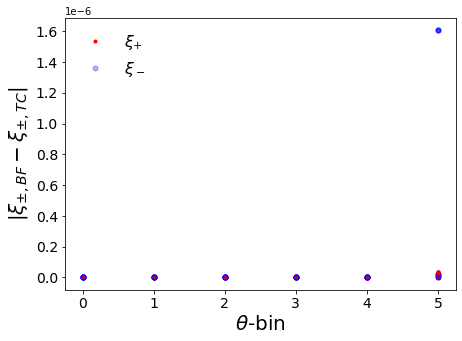

In [12]:
plt.figure(figsize=(7,5))
for ii in range(len(bruteForce)):
    plt.plot(abs(bruteForce[ii][0]-treeCorr[ii][0]),c="red",linestyle="none",marker=".",markersize=6,
            label="$\\xi_{+}$")
    plt.plot(abs(bruteForce[ii][1]-treeCorr[ii][1]),c="blue",linestyle="none",marker=".",markersize=10,alpha=.3,
             label="$\\xi_-$")
    if ii==0:plt.legend(frameon=False,fontsize=16)
plt.ylabel("$|\\xi_{\pm,BF}-\\xi_{\pm,TC}|$",fontsize=20);plt.xlabel("$\\theta$-bin",fontsize=20)
plt.yticks(fontsize=14);plt.xticks(fontsize=14);
plt.show()

### Defining a larger catalog 
We now know how TC "works", so let's use it to broadcast a bigger catalog with random values for the shear components

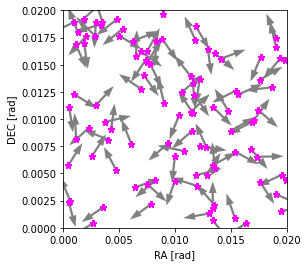

In [13]:
n=100 # number of pts
np.random.seed(2450)
ra=np.random.random_sample(n)*boxsize
dec=np.random.random_sample(n)*boxsize
cat=[[np.transpose(ra)[ii],np.transpose(dec)[ii]] for ii in range(n)]
for p in cat[:]:
    p.append(np.random.uniform(low=-.5,high=.5))
    p.append(np.random.uniform(low=-.5,high=.5))
# for plotting
plotpnts(cat,[0,boxsize],[0,boxsize],boxsize=boxsize,arrow=True,scale=4,annotate=False)

In [14]:
tcCat2=tc.Catalog(ra=ra,dec=dec,g1=np.transpose(cat)[2],g2=np.transpose(cat)[3],ra_units="rad",dec_units="rad")
ggcorr2=tc.GGCorrelation(nbins=rbin,min_sep=minr,max_sep=maxr,sep_units="rad",verbose=0)
ggcorr2.process(tcCat2)

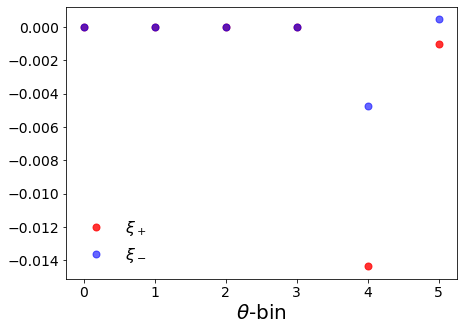

In [15]:
plt.figure(figsize=(7,5))
plt.plot(ggcorr2.xip,label="$\\xi_+$",linestyle="none",marker=".",markersize=14,alpha=.8,c="red")
plt.plot(ggcorr2.xim,label="$\\xi_-$",linestyle="none",marker=".",markersize=14,alpha=.6,c="blue")
plt.legend(frameon=False,fontsize=16); plt.xlabel("$\\theta$-bin",fontsize=20);
plt.yticks(fontsize=14);plt.xticks(fontsize=14);
plt.show()